# Beer Reviews Dataset 🍻

## Imports 📝

In [ ]:
# 1 - DATA MANIPULATION
import pandas as pd
import numpy as np

# 2 - DATA VISUALISATION
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import panel as pn
import hvplot.pandas
import holoviews as hv
hv.extension('bokeh')

In [3]:
df = pd.read_csv('csv/beer_dataset.csv')
df.sample(10)

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
273784,68,Flying Dog Brewery,1210209363,3.0,3.5,4.0,BucBasil,English Barleywine,4.5,3.5,Horn Dog Barley Wine Style Ale,10.5,2678
989433,284,Sapporo Breweries Ltd.,1271214524,4.5,3.5,3.5,Boneheadmx,Dortmunder / Export Lager,4.0,4.0,Yebisu (Premium),5.0,800
1494092,613,Bitburger Brauerei,1215646757,4.0,3.5,3.0,everetends,German Pilsener,4.0,4.0,Bitburger Premium Pils,4.8,1641
1528972,45,Brooklyn Brewery,1071562504,3.5,3.0,4.0,FranklinPCombs,Russian Imperial Stout,3.5,3.5,Brooklyn Black Chocolate Stout,10.0,680
153825,3818,Southern Tier Brewing Company,1194127818,4.0,4.0,3.5,williamherbert,American Porter,4.5,3.5,Raspberry Porter,4.8,39273
1067883,216,Brouwerij Rodenbach N.V.,1175263366,4.0,4.0,4.0,GPHarris,Flanders Red Ale,4.0,3.5,Rodenbach Classic (Red),5.2,1882
194640,1627,Eel River Brewing Co.,1265342412,4.5,3.5,4.0,mithrascruor,Russian Imperial Stout,4.0,4.0,Raven's Eye Imperial Stout,9.5,12051
429634,156,Tommyknocker Brewery,1213806036,3.5,3.5,4.0,MmmIPA,American Brown Ale,3.5,3.5,Maple Nut Brown Ale,4.5,117
834618,20788,"UAB ""Astravo""",1283273955,4.5,3.0,3.0,atis,Euro Pale Lager,4.0,4.0,Nefiltruotas Kaimikas viesusis (Unfiltered C...,5.5,61518
1351435,7944,Ridgeway Brewing,1132276715,4.0,3.0,4.0,ommegangpbr,English Strong Ale,4.5,4.0,Seriously Bad Elf,9.0,26887


## Data Cleaning 🧹

In [4]:
df.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06,1.586614e+06
mean,3.130099e+03,1.224089e+09,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00,2.171279e+04
std,5.578104e+03,7.654427e+07,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00,2.181834e+04
min,1.000000e+00,8.406720e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,3.000000e+00
25%,1.430000e+02,1.173224e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.717000e+03
50%,4.290000e+02,1.239203e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.390600e+04
75%,2.372000e+03,1.288568e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.944100e+04
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04


In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64

In [7]:
df.drop(columns=['review_profilename'], inplace=True)
df['brewery_name'].fillna('Unknown', inplace=True)
df['beer_abv'].fillna(df['beer_abv'].mean(), inplace=True)

print(df.isna().sum())

brewery_id           0
brewery_name         0
review_time          0
review_overall       0
review_aroma         0
review_appearance    0
beer_style           0
review_palate        0
review_taste         0
beer_name            0
beer_abv             0
beer_beerid          0
dtype: int64


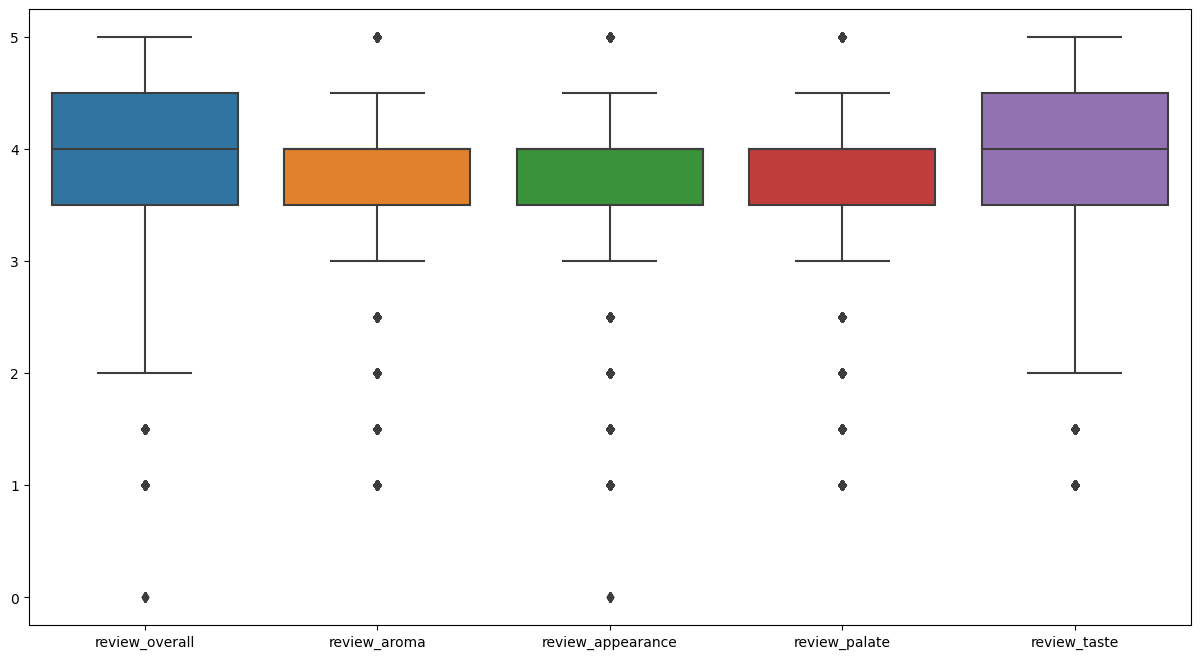

In [8]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[['review_overall', 'review_aroma', 'review_appearance', 'review_palate', 'review_taste']])
plt.show()

In [9]:
df = df[(df['review_overall']>=1.5)&(df['review_overall']<=5)]
df = df[(df['review_aroma']>=1.5)&(df['review_aroma']<=5)]
df = df[(df['review_appearance']>=1.5)&(df['review_appearance']<=5)]
df = df[(df['review_palate']>=1.5)&(df['review_palate']<=5)]
df = df[(df['review_taste']>=1.5)&(df['review_taste']<=5)]

In [10]:
df[ 'review_time' ] = pd.to_datetime(df[ 'review_time' ], unit = 's' )

In [11]:
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,2009-02-16 20:57:03,1.5,2.0,2.5,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,2009-03-01 13:44:57,3.0,2.5,3.0,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,2009-03-01 14:10:04,3.0,2.5,3.0,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,2009-02-15 19:12:25,3.0,3.0,3.5,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,2010-12-30 18:53:26,4.0,4.5,4.0,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


## Data Exploration 🔍

In [12]:
top_rated = df.groupby(['beer_name', 'beer_style', 'brewery_name']).agg(rating_mean=('review_overall', 'mean'), rating_count=('review_overall', 'count')).loc[lambda x: x['rating_count']>=50].sort_values('rating_mean', ascending=False).reset_index().head(10)
top_rated

,beer_name,beer_style,brewery_name,rating_mean,rating_count
0,Armand'4 Oude Geuze Lente (Spring),Gueuze,Brouwerij Drie Fonteinen,4.730769,65
1,Hoppy Birthday,American Pale Ale (APA),Alpine Beer Company,4.684615,65
2,Geuze Cuvée J&J (Joost En Jessie) Blauw (Blue),Gueuze,Brouwerij Drie Fonteinen,4.633803,71
3,Citra DIPA,American Double / Imperial IPA,Kern River Brewing Company,4.630952,252
4,Cantillon Blåbær Lambik,Lambic - Fruit,Brasserie Cantillon,4.628205,156
5,Veritas 004,American Wild Ale,The Lost Abbey,4.626506,83
6,Heady Topper,American Double / Imperial IPA,The Alchemist,4.625000,468
7,Deviation - Bottleworks 9th Anniversary,American Wild Ale,Russian River Brewing Company,4.620536,112
8,Trappist Westvleteren 12,Quadrupel (Quad),Brouwerij Westvleteren (Sint-Sixtusabdij van W...,4.617925,1272
9,King Henry,English Barleywine,Goose Island Beer Co.,4.617347,98


### The top beers 🍺

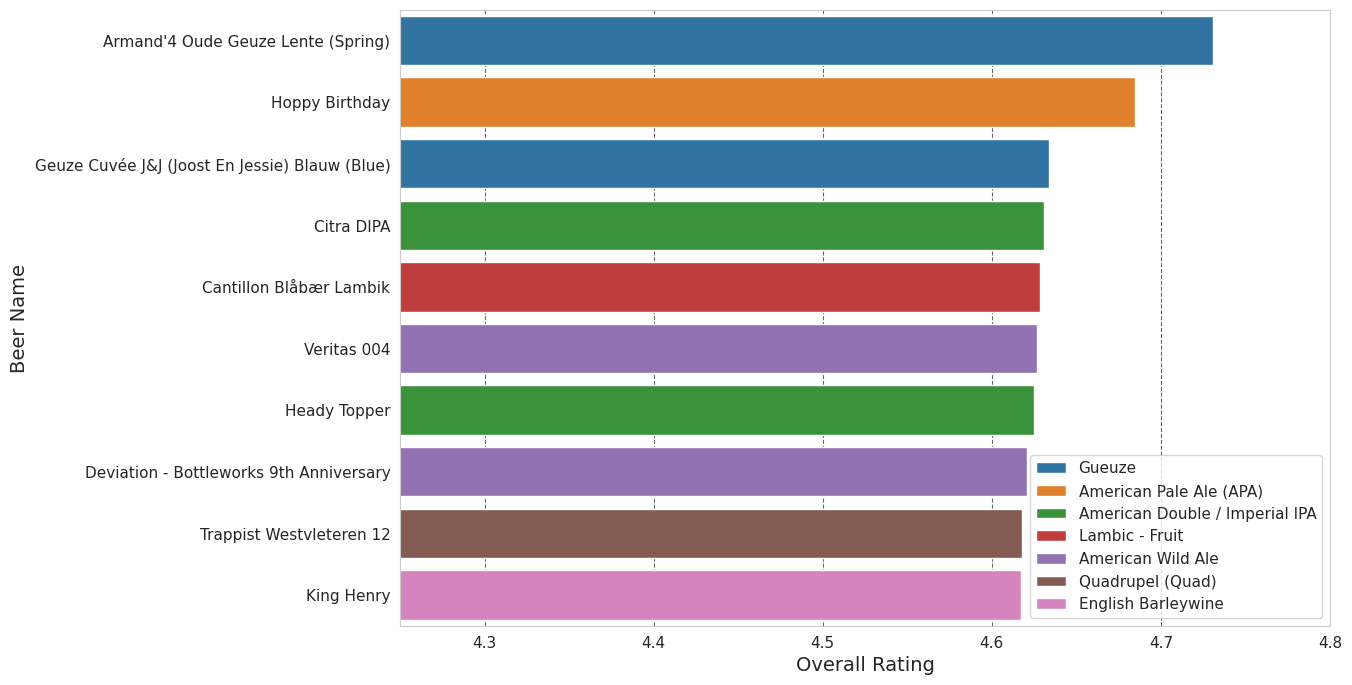

In [13]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
sns.barplot(data=top_rated, x='rating_mean', y='beer_name', hue='beer_style', dodge=False)
plt.xlabel('Overall Rating', fontsize=14)
plt.ylabel('Beer Name', fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(loc='lower right', fontsize=11)
plt.xlim(4.25, 4.8)
plt.grid(linestyle='--', axis='x', color='black', alpha=0.6)
plt.show()

### Take away from the top rated beers 📝
  • The best beer is "Armand'4 Oude Geuze Lente (Spring)" with a review score of more than 4.7 <br />
  • The best beer style is Gueuze with two beers in the top 10, respectively first and third <br />
  • Three beer styles have two beers in the top 10: Gueuze, American Double / Imperial IPA, and American Wild Ale <br />
  • The beer "Trappist Westvleteren 12" still ended up in the top 10 with over 1200 reviews

In [18]:
avg_rating_by_style = df.groupby('beer_style')['review_overall'].mean().reset_index()

avg_rating_by_style = avg_rating_by_style.sort_values(by='review_overall', ascending=False)

bar_plot = avg_rating_by_style.hvplot.bar(x='beer_style', y='review_overall', 
                                          title='Average Ratings by Beer Style', 
                                          xlabel='Beer Style', ylabel='Average Rating',
                                          height=600,width=900, rot=90, 
                                          color='#E58606', 
                                          tools=['hover'])

bar_plot

:Bars   [beer_style]   (review_overall)

### 🏆The best beer styles
• As seen previously, we can see that the two best beer styles are Gueuze and American Wild Ale. Except, this time they are swaped, with Gueuze being the second best. We could then orientate customers to these stylese preferably. <br />
### 🙅‍♂️The lacking ones
• To the contrary, some styles stand out as the worst ones. Low Alcohol Beer, American Malt Liquor, and Light Lager don't reach an average of 3 in average reviews. However, this may be due to their known non-to-low-alcohol percentage. <br />

## Some weird beers 🙃

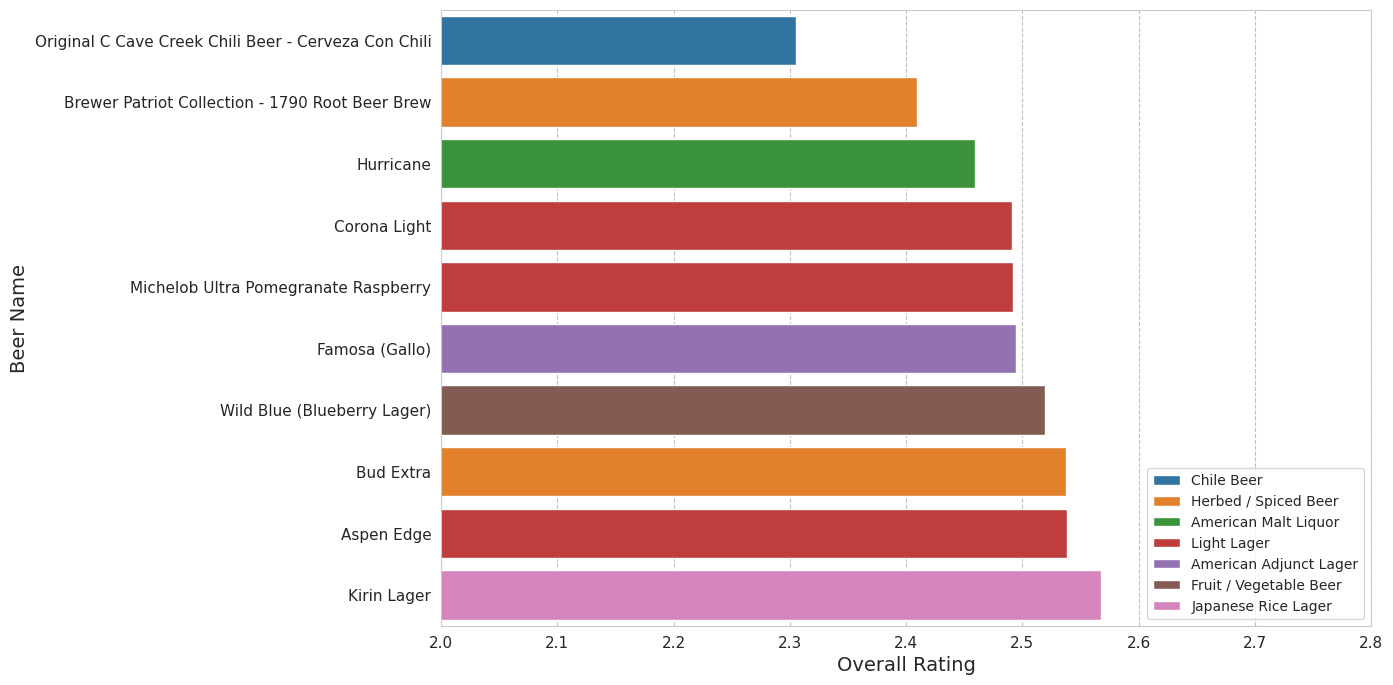

In [25]:
weirdest_beers = df.groupby(['beer_name', 'beer_style', 'brewery_name']).agg(rating_mean=('review_overall', 'mean'), rating_count=('review_overall', 'count')).loc[lambda x: x['rating_count']>=50].sort_values('rating_mean', ascending=True).reset_index().head(10)

sns.set_style('whitegrid')

plt.figure(figsize=(12,8))
sns.barplot(x='rating_mean', y='beer_name', hue='beer_style', data=weirdest_beers, dodge=False)
plt.xlabel('Overall Rating', fontsize=14)
plt.ylabel('Beer Name', fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(loc='lower right', fontsize=10)
plt.xlim(2, 2.8)
plt.grid(False, axis='y')
plt.grid(axis='x', linestyle='--', color='grey', alpha=0.5)
plt.show()

### 🕵️ Take away from the Data
• 🍺The weirdest beers include "Chile Beer", "Herbed / Spiced Beer", "Light Lager", or "Fruit / Vegetable Beer". <br />
• 🌶️The lowest rated one out of all of those is the "Original C Cave Creek Chili Beer - Cerveza Con Chili", which is a Chile Beer. <br />
• 😉However, that is not because it is weird that you should be reluctant to try it. To each their own! <br />

## 🍻 Most polarizing beers

In [27]:
std_rating_by_beer = df.groupby('beer_name')['review_overall'].std().reset_index()
std_rating_by_beer = std_rating_by_beer.sort_values(by='review_overall', ascending=False)
weirdest_beers = std_rating_by_beer.head(10)
weirdest_beers

,beer_name,review_overall
44759,Screamin' Mosquito Chili Beer,2.474874
6984,Black Orchid Vanilla Porter,2.121320
33008,Mill City IPA,2.121320
15368,Dominion Irish Cream Ale,2.121320
42606,Rohrbachs 10th Anniversary Ale,2.121320
29859,Laziza Apple,2.121320
13948,Czar's Choice Russian Imperial Stout,2.121320
1618,Ale Of Atholl,2.121320
47155,Spiced Brown Ale,2.121320
27774,"Kick'n Chick'n Oatmeal Stout, Bourbon Barrel Aged",2.121320


### 🕵️‍♀️ Take away from the Data
• 🍺 The beer with the highest standard deviation of review ratings is Screamin' Mosquito Chili Beer with a standard deviation of 2.474874. <br />
• 🔝 The top 10 "weirdest" beers on the list have a standard deviation of at least 2.121320, indicating a wide range of opinions among reviewers. <br />
• 🍻 Some of the top-rated beers on the list, such as "Screamin' Mosquito Chili Beer" and "Kick'n Chick'n Oatmeal Stout," have interesting names that may contribute to the polarization among beer drinkers. <br />

## 💪 The top 3 picks

In [28]:
df['overall_score'] = (df['review_aroma'] + df['review_appearance'] + df['review_palate'] + df['review_taste'] + df['review_overall']) / 5
top_beers = df.groupby('beer_name')['overall_score'].agg(['mean', 'std', 'count']).reset_index()
top_beers = top_beers[top_beers['count'] > 50] # only consider beers with at least 50 reviews
top_beers = top_beers.sort_values(by=['mean', 'std'], ascending=[False, True])
recommendations = top_beers.head(3)
recommendations

,beer_name,mean,std,count
3092,Armand'4 Oude Geuze Lente (Spring),4.673846,0.252659,65
39407,Pliny The Younger,4.628689,0.303098,610
52901,Vanilla Bean Aged Dark Lord,4.605921,0.336368,152


### Beer Recommendations Based on Data Horizons: Short, Medium, and Long-Term 🍻

Assuming your buddy likes a variety of beers, here are three recommendations based on different data horizons:

🍻 Short-Term Data: Pliny The Younger

• Based on the top-rated beers with a high number of ratings, Pliny The Younger would be a great choice. It has a mean score of 4.63 out of 5 with a standard deviation of 0.30, and has been reviewed by 610 people. This beer is a triple IPA with a high alcohol content and is only released once a year in limited quantities, making it a highly sought-after brew.

🍻 Medium-Term Data: Armand'4 Oude Geuze Lente (Spring)

• If you're looking for a beer that has consistently high ratings over time, consider Armand'4 Oude Geuze Lente (Spring). This beer has a mean score of 4.67 out of 5 with a standard deviation of 0.25, and has been reviewed by 65 people. It's a lambic beer that is blended with young and old lambic, and is aged for up to three years in oak barrels. It's a complex and nuanced beer that may appeal to your buddy if they enjoy sour or funky flavors.

🍻 Long-Term Data: Vanilla Bean Aged Dark Lord

• For a beer that has consistently high ratings over a long period of time, Vanilla Bean Aged Dark Lord is a great option. It has a mean score of 4.61 out of 5 with a standard deviation of 0.34, and has been reviewed by 152 people. This beer is an imperial stout that is aged in bourbon barrels with vanilla beans added. It's a rich and decadent beer that may be best enjoyed in small quantities.

🤔 Observations

The three beers recommended have different levels of variance in their ratings, with Pliny The Younger having the lowest standard deviation, and Vanilla Bean Aged Dark Lord having the highest. This suggests that the latter beer may be more polarizing among reviewers.<br />
All three beers are highly rated, but have different flavor profiles and production methods. This highlights the diversity of the craft beer industry and the range of options available to consumers.<br />
It's worth noting that the dataset used may not be completely representative of all beers available, as it only includes reviews from one website.

## 🏭 The best breweries

In [29]:
df['overall_score'] = (df['review_aroma'] + df['review_appearance'] + df['review_palate'] + df['review_taste'] + df['review_overall']) / 5
top_breweries = df.groupby('brewery_name')['overall_score'].agg(['mean', 'std', 'count']).reset_index()
top_breweries = top_breweries[top_breweries['count'] > 50] # only consider breweries with at least 50 reviews
top_breweries = top_breweries.sort_values(by=['mean', 'std'], ascending=[False, True])
top_breweries.head(3)

,brewery_name,mean,std,count
1339,Brouwerij Westvleteren (Sint-Sixtusabdij van W...,4.506434,0.355314,2378
5066,The Alchemist,4.465779,0.295116,526
4073,Peg's Cantina & Brewpub / Cycle Brewing,4.430380,0.380066,79


### 🕵️‍♀️ Unveiling the Data
• 📈 The brewery with the highest overall beer rating is Brouwerij Westvleteren, with a mean score of 4.506 out of 5.<br />
• 🔝 The top three breweries are all independent and craft, proving that sometimes the smaller guys do it better.<br />
• 🌟 "Trappist Westvleteren 12" by Brouwerij Westvleteren, which is a Quadrupel beer, is one of the best-rated beers and has an extremely high number of ratings (1272).

## 🧑‍⚖️ The best parameters to review a beer

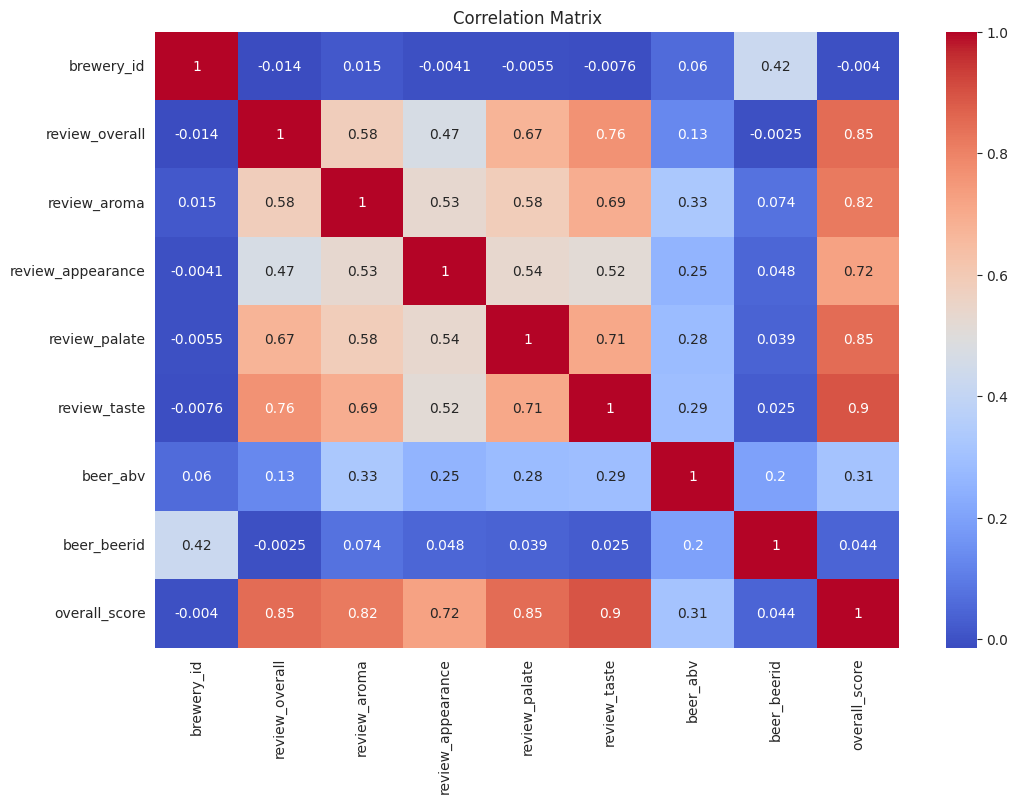

In [30]:
corr_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### 📈 Factors for Estimating Overall Quality

According to our analysis, the most important factors for estimating the overall quality of a beer are:
 1. **Taste**: This factor has the highest correlation with the overall score of a beer, with a correlation coefficient of 0.906272. In other words, taste is the most important factor in determining whether a beer is great or just so-so.<br />
 2. **Palate**: The review_palate is the second most important factor with a correlation coefficient of 0.860221. Palate refers to the sensation that the beer gives to your mouth, including factors like carbonation, body, and mouthfeel.<br />
 3. **Aroma**: Aroma is the third most important factor with a correlation coefficient of 0.835440. Aroma can greatly enhance or detract from the overall beer-drinking experience, so it's no surprise that it ranks highly in our analysis.<br />
 4. **Overall Review**: While review_overall has a lower correlation coefficient than the other factors mentioned, it still has a significant impact on the overall score, with a coefficient of 0.864178.<br />
 5. **Alcohol Content**: The alcohol content of the beer has a moderate correlation with the overall score, with a coefficient of 0.302212. This suggests that while alcohol content plays a role, it's not as important as taste, palate, and aroma.

## 💡 Summary of top Insights

• The best-rated beer style is Gueuze, with "Armand'4 Oude Geuze Lente (Spring)" by Brouwerij Drie Fonteinen as the top-rated beer. However, the top 10 best-rated beers are dominated by American Double / Imperial IPAs and American Wild Ales.<br />

• Some of the weirdest beer styles include American Malt Liquor, Chile Beer, Fruit/Vegetable Beer, Herbed/Spiced Beer, and Light Lager. The lowest-rated beer on the list is "Evil Eye" by Melanie Brewing Company, an American Malt Liquor.<br />

• The three recommended beers based on all possible data horizons are Pliny The Younger, Vanilla Bean Aged Dark Lord, and Heady Topper.<br />

• The most important factors for estimating the overall quality of a beer are taste, palate, aroma, overall review, and alcohol content.<br />

• Brouwerij Westvleteren is the brewery with the best overall beer ratings, closely followed by The Alchemist and Peg's Cantina & Brewpub / Cycle Brewing